# 2.3 통계 기반 기법

2.3.1 파이썬으로 말뭉치(corpus) 전처리하기

In [ ]:
# text로 문장 하나 할당
text = 'You say goodbye and I say hello.'
# 전처리
text = text.lower()
text = text.replace('.', ' .')
text

'you say goodbye and i say hello .'

In [ ]:
# text를 단어 단위로 분할
words = text.split(' ')
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

In [8]:
len([]), len('')

(0, 0)

In [ ]:
# 단어에 id 부여하여 id와 단어 짝지어 주기
word_to_id = {}
id_to_word = {}

for word in words:
    if word not in word_to_id: # 없을 경우에만 딕셔너리에 삽입
        new_id = len(word_to_id) # 0부터 id 부여
        word_to_id[word] = new_id
        id_to_word[new_id] = word

In [10]:
word_to_id

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}

In [5]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [11]:
import numpy as np
corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [1]:
from utils import preprocess
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
corpus, word_to_id, id_to_word

(array([0, 1, 2, 3, 4, 1, 5, 6]),
 {'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6},
 {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'})

2.3.4 동시발생 행렬

각 단어의 맥락으로써 동시에 발생하는 단어의 빈도를 행렬로 표현

이 때 맥락의 범위를 윈도우로 크기 조절함

In [3]:
import numpy as np
from utils import preprocess
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

print(corpus)

print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [4]:
vocab_size = len(id_to_word)
window_size = 1
corpus_size = len(corpus)
co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

for idx, word_id in enumerate(corpus):
    for i in range(1, window_size + 1):
        left_idx = idx - i
        right_idx = idx + i

        if left_idx >= 0: # co_matrix 왼쪽 경계 벗어나는지 확인
            left_word_id = corpus[left_idx]
            co_matrix[word_id, left_word_id] += 1

        if right_idx < corpus_size: # co_matrix 오른쪽 경계 벗어나는지 확인
            right_word_id = corpus[right_idx]
            co_matrix[word_id, right_word_id] += 1

co_matrix

array([[0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0]])

In [ ]:
import numpy as np
from utils import preprocess
from utils import create_co_matrix
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(id_to_word)
create_co_matrix(corpus, vocab_size)

array([[0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0]])

```py
        you say goodbye and i hello .
  you  [[0,  1,    0,    0, 0,  0,  0],
  say   [1,  0,    1,    0, 1,  1,  0],
goodbye [0,  1,    0,    1, 0,  0,  0],
  and   [0,  0,    1,    0, 1,  0,  0],
   i    [0,  1,    0,    1, 0,  0,  0],
 hello  [0,  1,    0,    0, 0,  0,  1],
   .    [0,  0,    0,    0, 0,  1,  0]]
 ```

2.3.5 벡터 간 유사도

In [ ]:
from utils import preprocess, create_co_matrix, cos_similarity

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']]
c1 = C[word_to_id['i']]
cos_similarity(c0, c1) # 코사인 유사도는 -1 ~ 1. cos의 범위

0.7071067691154799

In [3]:
import numpy as np
c0 / (np.sqrt(np.sum(c0**2))), c1 / (np.sqrt(np.sum(c1**2)))

(array([0., 1., 0., 0., 0., 0., 0.]),
 array([0.        , 0.70710678, 0.        , 0.70710678, 0.        ,
        0.        , 0.        ]))

In [7]:
0.70710678**2 + 0.70710678**2

0.9999999966439369

In [8]:
np.sqrt(1/2)

0.7071067811865476

2.3.6 유사 단어의 랭킹 표시

In [1]:
import numpy as np
x = np.array([100, -20, 2])
x.argsort()

array([1, 2, 0], dtype=int64)

In [2]:
(-x).argsort()

array([0, 2, 1], dtype=int64)

In [3]:
-x.argsort()

array([-1, -2,  0], dtype=int64)

In [4]:
from utils import preprocess, create_co_matrix, most_similar

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

most_similar('you', word_to_id, id_to_word, C, top=5)


[query] you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 hello: 0.7071067691154799
 say: 0.0
 and: 0.0


# 2.4 통계 기반 기법 개선하기

2.4.1 상호정보량

점별 상호정보량(PMI)
\
양의 상호정보량(PPMI)

In [2]:
import numpy as np
from utils import preprocess, create_co_matrix, cos_similarity, ppmi

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C, verbose=True)

np.set_printoptions(precision=3) # 유효 자릿수를 세 자리로 표시
print('동시발생 행렬')
print(C)
print('-'*50)
print('PPMI')
print(W)

2.0% 완료
4.1% 완료
6.1% 완료
8.2% 완료
10.2% 완료
12.2% 완료
14.3% 완료
16.3% 완료
18.4% 완료
20.4% 완료
22.4% 완료
24.5% 완료
26.5% 완료
28.6% 완료
30.6% 완료
32.7% 완료
34.7% 완료
36.7% 완료
38.8% 완료
40.8% 완료
42.9% 완료
44.9% 완료
46.9% 완료
49.0% 완료
51.0% 완료
53.1% 완료
55.1% 완료
57.1% 완료
59.2% 완료
61.2% 완료
63.3% 완료
65.3% 완료
67.3% 완료
69.4% 완료
71.4% 완료
73.5% 완료
75.5% 완료
77.6% 완료
79.6% 완료
81.6% 완료
83.7% 완료
85.7% 완료
87.8% 완료
89.8% 완료
91.8% 완료
93.9% 완료
95.9% 완료
98.0% 완료
100.0% 완료
동시발생 행렬
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


2.4.3 SVD에 의한 차원감소

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from utils import preprocess, create_co_matrix, ppmi

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(id_to_word)
C = create_co_matrix(corpus, vocab_size, window_size=1)
W = ppmi(C)

# SVD
U, S, V = np.linalg.svd(W)

In [ ]:
print(C[0]) # 동시발생 행렬
print(W[0]) # PPMI 행렬, W[0]: 희소벡터
print(U[0]) # SVD, U[0]: 밀집벡터

[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[ 3.409e-01 -1.110e-16 -4.441e-16 -1.205e-01  0.000e+00 -9.323e-01
 -1.086e-16]


In [ ]:
U[0, :2] # 2차원 벡터로 줄이기

array([ 3.409e-01, -1.110e-16], dtype=float32)

In [12]:
S

array([3.168e+00, 3.168e+00, 2.703e+00, 2.703e+00, 1.514e+00, 1.514e+00,
       2.555e-17], dtype=float32)

In [13]:
V[0]

array([-0.000e+00,  5.976e-01,  2.257e-16,  4.978e-01,  1.701e-16,
       -2.739e-16,  6.285e-01], dtype=float32)

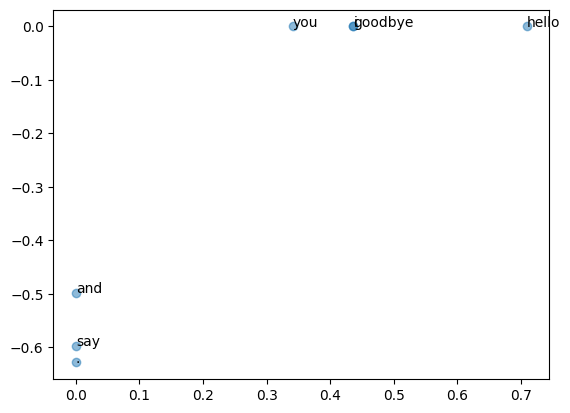

In [ ]:
# 각 단어를 2차원 벡터로 표현 후 시각화
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1])) # 텍스트 표시

plt.scatter(U[:, 0], U[:, 1], alpha=0.5) # i와 goodbye 겹쳐 있음.
plt.show()

2.4.4 PTB(Penn Treebank) 데이터셋

희소한 단어 => <unk>
\
숫자 => N
\
ptb.load_data에 의해 각 문장을 연결한 하나의 큰 시계열 데이터로 전처리함.

In [6]:
from data import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')

print('말 뭉치 크기:', len(corpus))
print('corpus[:30]:', corpus[:30])
print()
print('id_to_word[0]:', id_to_word[0])
print('id_to_word[1]:', id_to_word[1])
print('id_to_word[2]:', id_to_word[2])
print()
print('word_to_id["car"]:', word_to_id['car'])
print('word_to_id["happy"]:', word_to_id['happy'])
print('word_to_id["lexus"]:', word_to_id['lexus'])

말 뭉치 크기: 929589
corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz

word_to_id["car"]: 3856
word_to_id["happy"]: 4428
word_to_id["lexus"]: 7426


2.4.5 PTB 데이터셋 평가

In [7]:
import numpy as np
from utils import most_similar, create_co_matrix, ppmi
from data import ptb

window_size = 2
wordvec_size = 100 # 차원 축소할 크기

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('동시발생 수 계산 ...')
C = create_co_matrix(corpus, vocab_size, window_size)
print('PPMI 계산')
W = ppmi(C, verbose=True)

print('SVD 계산 ...')
try:
    # truncated SVD (빠르다!)
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5, random_state=None)
except ImportError:
    # SVD (느리다)
    U, S, V = np.linalg.svd(W)

word_vecs = U[:, :wordvec_size]

querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)

동시발생 수 계산 ...
PPMI 계산


c:\Users\muse1\Desktop\TIL\밑바닥부터 시작하는 딥러닝2\utils.py:79: RuntimeWarning: overflow encountered in scalar multiply
  pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
c:\Users\muse1\Desktop\TIL\밑바닥부터 시작하는 딥러닝2\utils.py:79: RuntimeWarning: invalid value encountered in log2
  pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)


1.0% 완료
2.0% 완료
3.0% 완료
4.0% 완료
5.0% 완료
6.0% 완료
7.0% 완료
8.0% 완료
9.0% 완료
10.0% 완료
11.0% 완료
12.0% 완료
13.0% 완료
14.0% 완료
15.0% 완료
16.0% 완료
17.0% 완료
18.0% 완료
19.0% 완료
20.0% 완료
21.0% 완료
22.0% 완료
23.0% 완료
24.0% 완료
25.0% 완료
26.0% 완료
27.0% 완료
28.0% 완료
29.0% 완료
30.0% 완료
31.0% 완료
32.0% 완료
33.0% 완료
34.0% 완료
35.0% 완료
36.0% 완료
37.0% 완료
38.0% 완료
39.0% 완료
40.0% 완료
41.0% 완료
42.0% 완료
43.0% 완료
44.0% 완료
45.0% 완료
46.0% 완료
47.0% 완료
48.0% 완료
49.0% 완료
50.0% 완료
51.0% 완료
52.0% 완료
53.0% 완료
54.0% 완료
55.0% 완료
56.0% 완료
57.0% 완료
58.0% 완료
59.0% 완료
60.0% 완료
61.0% 완료
62.0% 완료
63.0% 완료
64.0% 완료
65.0% 완료
66.0% 완료
67.0% 완료
68.0% 완료
69.0% 완료
70.0% 완료
71.0% 완료
72.0% 완료
73.0% 완료
74.0% 완료
75.0% 완료
76.0% 완료
77.0% 완료
78.0% 완료
79.0% 완료
80.0% 완료
81.0% 완료
82.0% 완료
83.0% 완료
84.0% 완료
85.0% 완료
86.0% 완료
87.0% 완료
88.0% 완료
89.0% 완료
90.0% 완료
91.0% 완료
92.0% 완료
93.0% 완료
94.0% 완료
95.0% 완료
96.0% 완료
97.0% 완료
98.0% 완료
99.0% 완료
SVD 계산 ...

[query] you
 i: 0.6406654715538025
 we: 0.6172826886177063
 do: 0.5606796741485596
 anybody: 0.54050809144